In [145]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [146]:
#Read in the csv file and convert to a Pandas dataframe
world_happiness_reports_2015 = pd.read_csv("Data/2015.csv")
world_happiness_reports_2016 = pd.read_csv("Data/2016.csv")
world_happiness_reports_2017 = pd.read_csv("Data/2017.csv")
world_happiness_reports_2018 = pd.read_csv("Data/2018.csv")
world_happiness_reports_2019 = pd.read_csv("Data/2019.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [147]:
world_happiness_reports_2015.shape,world_happiness_reports_2016.shape,world_happiness_reports_2017.shape,world_happiness_reports_2018.shape,world_happiness_reports_2019.shape
#This shows the number of rows and columns for each DataFrame.
# Based on the result, if there is a high number of rows, it may indicate the presence of duplicate values or missing entries in some DataFrames.

((158, 12), (157, 13), (155, 12), (156, 9), (156, 9))

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [148]:
world_happiness_reports_2015.head()
#Country: The name of the country.
#Region: The geographical region.
#Happiness Rank: The rank of the country based on its happiness score.
#Happiness Score: A numerical score representing the overall happiness level of the country, mabey it's on a scale from 0 to 10.
#Standard Error: A measure of the accuracy of the happiness score, indicating the variability or uncertainty in the score.
#Economy (GDP per Capita): This reflects the economic performance of the country.
#Family: mabey it's reflecting the importance of family connections in contributing to happiness.
#Health (Life Expectancy): This indicates the average life expectancy in the country.
#Freedom: The degree of personal freedom experienced by individuals in the country.
#Trust (Government Corruption): A measure of trust in government institutions.
#Generosity: This reflects the level of charitable behavior or the willingness to help others.
#Dystopia Residual: A hypothetical construct representing a baseline of unhappiness.

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [149]:
world_happiness_reports_2016.head()
#Lower Confidence Interval: The lower bound of the confidence interval for the happiness score, indicating a range of uncertainty.
#Upper Confidence Interval: The upper bound of the confidence interval for the happiness score.

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [150]:
world_happiness_reports_2017.head()
#Whisker High: The upper bound of the confidence interval for the happiness score, indicating the potential maximum score.
#Whisker Low: The lower bound of the confidence interval for the happiness score, indicating the potential minimum score.

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [151]:
world_happiness_reports_2018.head()
#Social Support: reflecting the strength of social connections and support available to individuals.
#Perceptions of Corruption: A measure of public perception regarding the corruption levels in government and institutions.

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [152]:
world_happiness_reports_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Based on the previous codes, it shows that there are some differences between the data frames, such as the number of columns, column names, and some extra or missing columns.

In [153]:
world_happiness_reports_2015.info()
#There are 158 rows.
#the DataFrame contains 12 columns.
# There is no missing valuse.
#Country and Region are object.
#Happiness Rank is integer
#While the reset of columns are floot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [154]:
world_happiness_reports_2016.info()
#There are 157 rows.
#the DataFrame contains 14 columns.
# There is no missing valuse.
#Country and Region are object.
#Happiness Rank is integer
#While the reset of columns are floot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [155]:
world_happiness_reports_2017.info()
#There are 155 rows.
#the DataFrame contains 12 columns.
# There is no missing valuse.
#Country is object.
#Happiness.Rank is integer
#While the reset of columns are floot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [156]:
world_happiness_reports_2018.info()
#There are 156 rows.
#the DataFrame contains 9 columns.
# There is a missing valuse in Perceptions of corruption.
#Country or region is object.
#Overall rank is integer
#While the reset of columns are floot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [157]:
world_happiness_reports_2019.info()
#There are 156 rows.
#the DataFrame contains 9 columns.
# There is no missing valuse.
#Country or region is object.
#Overall rank is integer
#While the reset of columns are floot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [158]:
world_happiness_reports_2015.describe()
# Happiness Rank:the count == max that shows that the ranks are sequential 
#Happiness Score: the Min: 2.84 and Max: 7.59 
#Standard Error:Mean: 0.0489 Standard Deviation: 0.0171 Min: 0.0185 Max: 0.1369
#Economy (GDP per Capita):Mean: 0.85 Min: 0.00 Max: 1.69
#Family:mean:0.991 min:0.0 max:1.690
#Health (Life Expectancy):mean:0.6302 min:0.0 max:1.0252
#Freedom:mean:0.4286 min:0.0 max:0.669
#Trust (Government Corruption):mean:0.1434 min:0.0 max:0.5519
#Generosity:mean:0.237 min:0.0 max:0.7958
#Dystopia Residual:mean:2.0989 min:0.328 max:3.602

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [159]:
world_happiness_reports_2015.describe(include="object")
#Country: the count == unique that shows that this no dublicate
# Region: the number of region mabey it's 10 if thire is no typo, and the most commen regine is Sub-Saharan Africa

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


In [160]:
world_happiness_reports_2016.describe()
# Happiness Rank:the count == max that shows that the ranks are sequential 
#Happiness Score: the Min: 2.905 which is more than 2015 and Max: 7.526 which is less than 2015
#Lower Confidence Interval:Mean: 5.282 Standard Deviation: 1.1480 Min: 2.732 Max: 7.460
#Upper Confidence Interval:Mean: 5.481 Standard Deviation: 1.136 Min: 3.078 Max: 7.6690
#Economy (GDP per Capita):Mean: 0.953 Min: 0.00 Max: 1.824
#Family:mean:0.793 min:0.0 max:1.183
#Health (Life Expectancy):mean:0.557619 min:0.0 max:0.952770 which is less than 2015
#Freedom:mean:0.370994 which is less than 2015 min:0.0 max:0.608
#Trust (Government Corruption):mean:0.137 min:0.0 max:0.505
#Generosity:mean:0.242 min:0.0 max:0.819710	
#Dystopia Residual:mean:2.325 min:0.817 max:3.837

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [161]:
world_happiness_reports_2016.describe(include="object")
#Country: the count == unique that shows that this no dublicate
# Region: the number of region mabey it's 10 if thire is no typo, and the most commen regine is Sub-Saharan Africa

,Country,Region
count,157,157
unique,157,10
top,Denmark,Sub-Saharan Africa
freq,1,38


In [162]:
world_happiness_reports_2017.describe()
# Happiness.Rank:the count == max that shows that the ranks are sequential 
#Happiness.Score: the Min: 2.693 which is less than 2015 and 2016 and Max: 7.537 which is neer to 2016
#Whisker.high:Mean: 5.452 Standard Deviation: 1.118 Min: 2.864 Max: 7.622
#Whisker.low:Mean: 5.255 Standard Deviation: 1.145 Min: 2.521 Max: 7.479
#Economy..GDP.per.Capita.:Mean: 0.984 Min: 0.00 Max: 1.870
#Family:mean:1.188 which is more than 2015 and 2016 min:0.0 max:1.6105
#Health..Life.Expectancy.:mean:0.5513 min:0.0 max:0.9494 which is less than 2015 and 2016
#Freedom:mean:0.4087 which is more than 2016 min:0.0 max:0.608
#Generosity:mean:0.246 min:0.0 max:0.838
#Trust..Government.Corruption.:mean:0.123 min:0.0 max:0.464
#Dystopia.Residual:mean:1.8502 min:0.3779 max:3.117

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [163]:
world_happiness_reports_2017.describe(include="object")
#Country: the count == unique that shows that this no dublicat.

,Country
count,155
unique,155
top,Norway
freq,1


In [164]:
world_happiness_reports_2018.describe()
# Overall rank:the count == max that shows that the ranks are sequential 
#Score: the Min: 2.905 which is more than 2016 and 2017  Max: 7.632 which is more to 2015,2016 and 2017
#GDP per capita.:Mean: 0.891 Min: 0.00 Max: 2.096
#Social support	:mean:1.2132 min:0.0 max:1.644
#Healthy life expectancy:mean:0.597 min:0.0 max:1.030 which is more than 2016 and 2017
#Freedom to make life choices:mean:0.4545 which is more than 2015,2016 and 2017 min:0.0 max:0.724
#Generosity:mean:0.181 min:0.0 max:0.598
#Perceptions of corruption :mean:0.112 min:0.0 max:0.457

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112000
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096492
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.137000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.598000,0.457000


In [165]:
world_happiness_reports_2018.describe(include="object")
#Country: the count == unique that shows that this no dublicate

,Country or region
count,156
unique,156
top,Finland
freq,1


In [166]:
world_happiness_reports_2019.describe()
# Overall rank:the count == max that shows that the ranks are sequential 
#Score: the Min: 2.853 which is less than 2018  Max: 7.769 which is more to 2015,2016,2018 and 2017
#GDP per capita.:Mean: 0.905 Min: 0.00 Max: 1.6840
#Social support	:mean:1.208 min:0.0 max:1.624
#Healthy life expectancy:mean:0.7252 min:0.0 max:1.1410 which is more than 2016,2017 and 2018
#Freedom to make life choices:mean:0.392 which is less than 2015,2017 and 2018 min:0.0 max:0.631
#Generosity:mean:0.184 min:0.0 max:0.566
#Perceptions of corruption :mean:0.110 min:0.0 max:0.453

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [167]:
world_happiness_reports_2019.describe(include="object")
#Country: the count == unique that shows that this no dublicate

,Country or region
count,156
unique,156
top,Finland
freq,1


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [168]:
#The data is from the Gallup World Poll.
# The Gallup World Poll tracks important issues worldwide, such as food access, business and economics, education, employment, health, migration, well-being and press freedom.
#Based on that, I see that the data is reliable.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [169]:
#Based on the time period for which I want the information, yes, the data is timeliness.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [170]:
#1-Duplicate Entries:beased on the bevios code thier is no duplicates.
#2-Range Checks:Happiness scores range from a minimum of 2.84 to a maximum of 7.59, which is consistent with expected values (0-10).
#3-Cross Validation:There is an observable correlation between higher GDP per capita and higher happiness scores, suggesting that the data is logically consistent.
#the data shows a high level of internal consistency

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [171]:
world_happiness_reports_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [172]:
world_happiness_reports_2016.head(3)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137


In [173]:
world_happiness_reports_2017.head(3)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715


In [174]:
world_happiness_reports_2018.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408


In [175]:
world_happiness_reports_2019.head(3)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341


In [176]:
#Sample: The data frames I have are related to the problem and within the same time period.
#Variable: It seems that all columns are related, so no dropping is needed for now.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [177]:
world_happiness_reports_2015.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


In [178]:
world_happiness_reports_2015.duplicated().sum()

np.int64(0)

In [179]:
world_happiness_reports_2015.duplicated(["Country"]).sum()

np.int64(0)

In [180]:
world_happiness_reports_2015.duplicated(["Happiness Rank"]).sum()

np.int64(1)

In [181]:
world_happiness_reports_2015[world_happiness_reports_2015.duplicated(["Happiness Rank"],keep=False)]#different countries

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
81,Jordan,Middle East and Northern Africa,82,5.192,0.04524,0.90198,1.05392,0.69639,0.40661,0.14293,0.11053,1.87996
82,Montenegro,Central and Eastern Europe,82,5.192,0.05235,0.97438,0.90557,0.72521,0.18260,0.14296,0.16140,2.10017


In [182]:
world_happiness_reports_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [183]:
world_happiness_reports_2016.duplicated().sum()

np.int64(0)

In [184]:
world_happiness_reports_2016.duplicated(["Country"]).sum()

np.int64(0)

In [185]:
world_happiness_reports_2016.duplicated(["Happiness Rank"]).sum()

np.int64(3)

In [186]:
world_happiness_reports_2016[world_happiness_reports_2016.duplicated(["Happiness Rank"],keep=False)]#different countries

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
33,Saudi Arabia,Middle East and Northern Africa,34,6.379,6.287,6.471,1.48953,0.84829,0.59267,0.37904,0.30008,0.15457,2.61482
34,Taiwan,Eastern Asia,34,6.379,6.305,6.453,1.39729,0.92624,0.79565,0.32377,0.06630,0.25495,2.61523
56,Poland,Central and Eastern Europe,57,5.835,5.749,5.921,1.24585,1.04685,0.69058,0.45190,0.05500,0.14443,2.20035
57,South Korea,Eastern Asia,57,5.835,5.747,5.923,1.35948,0.72194,0.88645,0.25168,0.07716,0.18824,2.35015
144,Burkina Faso,Sub-Saharan Africa,145,3.739,3.647,3.831,0.31995,0.63054,0.21297,0.33370,0.12533,0.24353,1.87319
145,Uganda,Sub-Saharan Africa,145,3.739,3.629,3.849,0.34719,0.90981,0.19625,0.43653,0.06442,0.27102,1.51416


In [187]:
world_happiness_reports_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [188]:
world_happiness_reports_2017.duplicated().sum()

np.int64(0)

In [189]:
world_happiness_reports_2017.duplicated("Country").sum()

np.int64(0)

In [190]:
world_happiness_reports_2017.duplicated(["Happiness.Rank"]).sum()

np.int64(0)

In [191]:
world_happiness_reports_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [192]:
world_happiness_reports_2018.duplicated().sum()

np.int64(0)

In [193]:
world_happiness_reports_2018.duplicated(["Country or region"]).sum()
#It looks like this column only contains countries, not regions, so it's better to rename the column.

np.int64(0)

In [194]:
world_happiness_reports_2018.duplicated(["Overall rank"]).sum()

np.int64(0)

In [195]:
world_happiness_reports_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [196]:
world_happiness_reports_2019.duplicated().sum()

np.int64(0)

In [197]:
world_happiness_reports_2019.duplicated("Country or region").sum()
#It looks like this column only contains countries, not regions, so it's better to rename the column.

np.int64(0)

In [198]:
world_happiness_reports_2018.duplicated(["Overall rank"]).sum()

np.int64(0)

In [199]:
# go to delete duplicates columns
#From the output, it seems that there is no duplication to remove.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

## 2015

In [200]:
#Display number missing values per column
world_happiness_reports_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [201]:
world_happiness_reports_2015[world_happiness_reports_2015["Country"] =="-"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [202]:
world_happiness_reports_2015[world_happiness_reports_2015["Region"] =="-"]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


## 2016

In [203]:
world_happiness_reports_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [204]:
world_happiness_reports_2016[world_happiness_reports_2016["Country"] =="-"]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


In [205]:
world_happiness_reports_2016[world_happiness_reports_2016["Region"] =="-"]

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual


## 2017

In [206]:
world_happiness_reports_2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [207]:
world_happiness_reports_2017[world_happiness_reports_2017["Country"] =="-"]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual


## 2018

In [208]:
world_happiness_reports_2018.isnull().sum().sort_values(ascending = False)

Perceptions of corruption       1
Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
dtype: int64

In [209]:
world_happiness_reports_2018[world_happiness_reports_2018['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN


In [210]:
world_happiness_reports_2018['Perceptions of corruption'].fillna(0, inplace=True)

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/3441749906.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  world_happiness_reports_2018['Perceptions of corruption'].fillna(0, inplace=True)


In [211]:
world_happiness_reports_2018[world_happiness_reports_2018['Perceptions of corruption'].isnull()]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [212]:
world_happiness_reports_2018[world_happiness_reports_2018["Country or region"] =="-"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


## 2019

In [213]:
world_happiness_reports_2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [214]:
world_happiness_reports_2019[world_happiness_reports_2019["Country or region"] =="-"]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption


In [215]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

# 2015

In [216]:
# check columns types 
world_happiness_reports_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [217]:
world_happiness_reports_2015.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# 2016


In [218]:
world_happiness_reports_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [219]:
world_happiness_reports_2016.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

# 2017

In [220]:
world_happiness_reports_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [221]:
world_happiness_reports_2017.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [222]:
world_happiness_reports_2017.rename(columns={'Happiness.Rank':"Happiness Rank",'Happiness.Score':'Happiness Score','Whisker.high':'Whisker high',
                                            'Whisker.low':'Whisker low','Economy..GDP.per.Capita.': 'Economy (GDP per Capita)','Health..Life.Expectancy.':'Health (Life Expectancy)',
                                            'Trust..Government.Corruption.':'Trust (Government Corruption)','Dystopia.Residual':'Dystopia Residual'},inplace=True)

In [223]:
world_happiness_reports_2017.head(2)

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707


# 2018

In [224]:
world_happiness_reports_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [225]:
world_happiness_reports_2018.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [226]:
world_happiness_reports_2018.rename(columns={'Overall rank':'Happiness Rank','Country or region':'Country','Score':'Happiness Score',
                                             'GDP per capita':'Economy (GDP per Capita)','Healthy life expectancy':'Health (Life Expectancy)',
                                             'Freedom to make life choices':'Freedom'},inplace=True)

In [227]:
world_happiness_reports_2018.head(2)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340


# 2019

In [228]:
world_happiness_reports_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [229]:
world_happiness_reports_2019.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [230]:
world_happiness_reports_2019.rename(columns={'Overall rank':'Happiness Rank','Country or region':'Country','Score':'Happiness Score',
                                             'GDP per capita':'Economy (GDP per Capita)','Healthy life expectancy':'Health (Life Expectancy)',
                                             'Freedom to make life choices':'Freedom'},inplace=True)

In [231]:
world_happiness_reports_2019.head(2)

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410


In [232]:
# go to clean them 

In [233]:
# check outliers 

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [234]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

# visualisation

# 2015

In [235]:
world_happiness_reports_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/797343171.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=world_happiness_reports_2015, x='Region', y='Happiness Score', estimator='mean', ci=None)


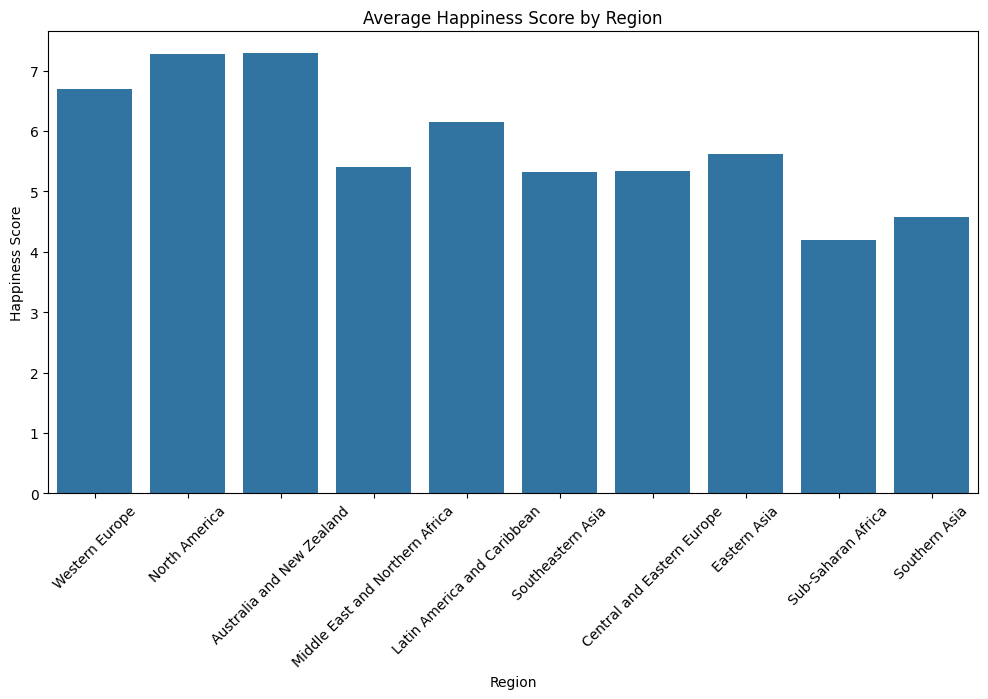

In [236]:
plt.figure(figsize=(12, 6))
sns.barplot(data=world_happiness_reports_2015, x='Region', y='Happiness Score', estimator='mean', ci=None)
plt.xticks(rotation=45)
plt.title('Average Happiness Score by Region')
plt.ylabel('Happiness Score')
plt.xlabel('Region')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/3640743862.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


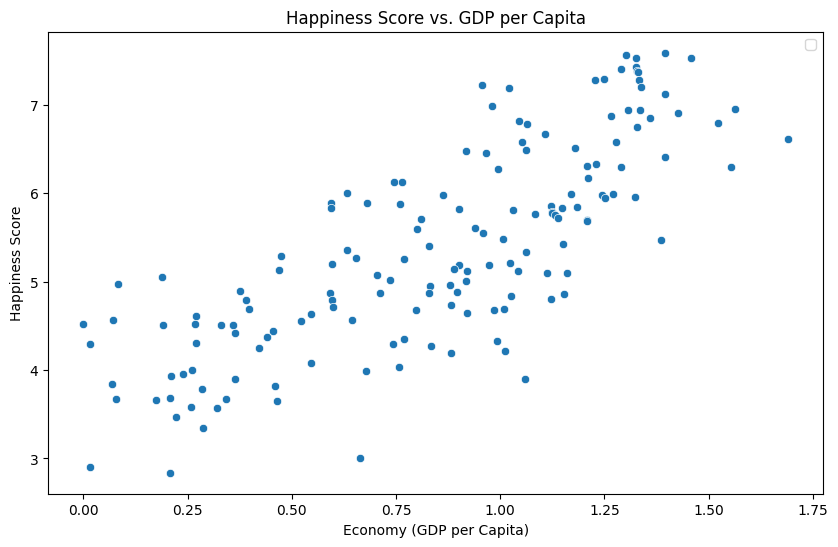

In [237]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2015, x='Economy (GDP per Capita)', y='Happiness Score')
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/2256209935.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


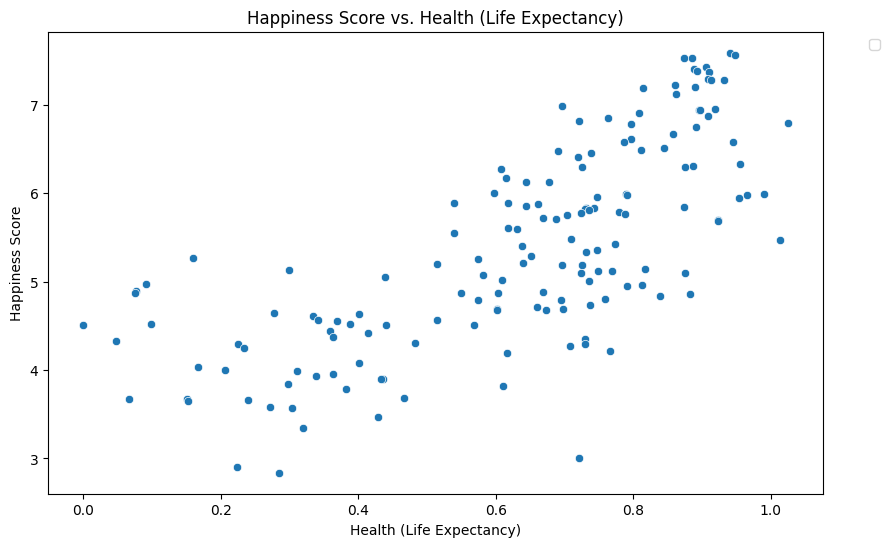

In [238]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2015, x='Health (Life Expectancy)', y='Happiness Score')
plt.title('Happiness Score vs. Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/748229445.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


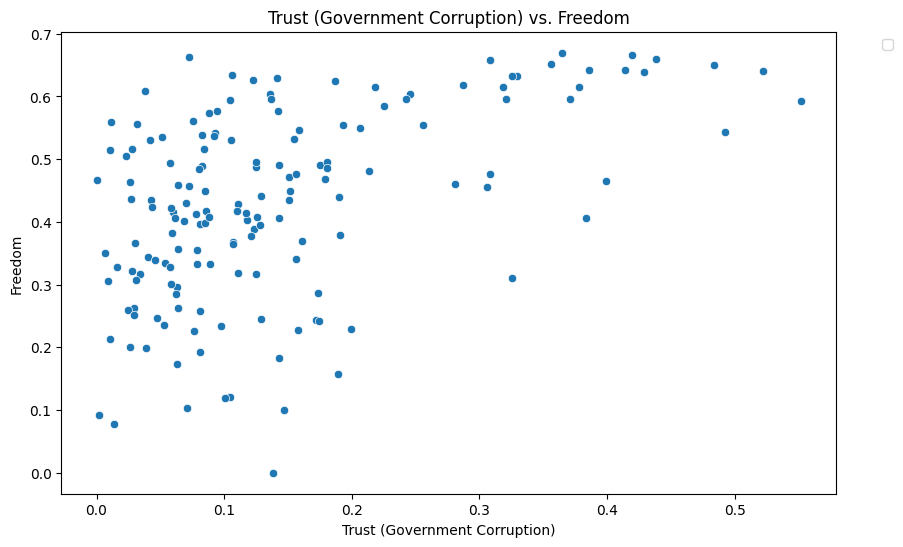

In [239]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2015, x='Trust (Government Corruption)', y='Freedom')
plt.title('Trust (Government Corruption) vs. Freedom')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

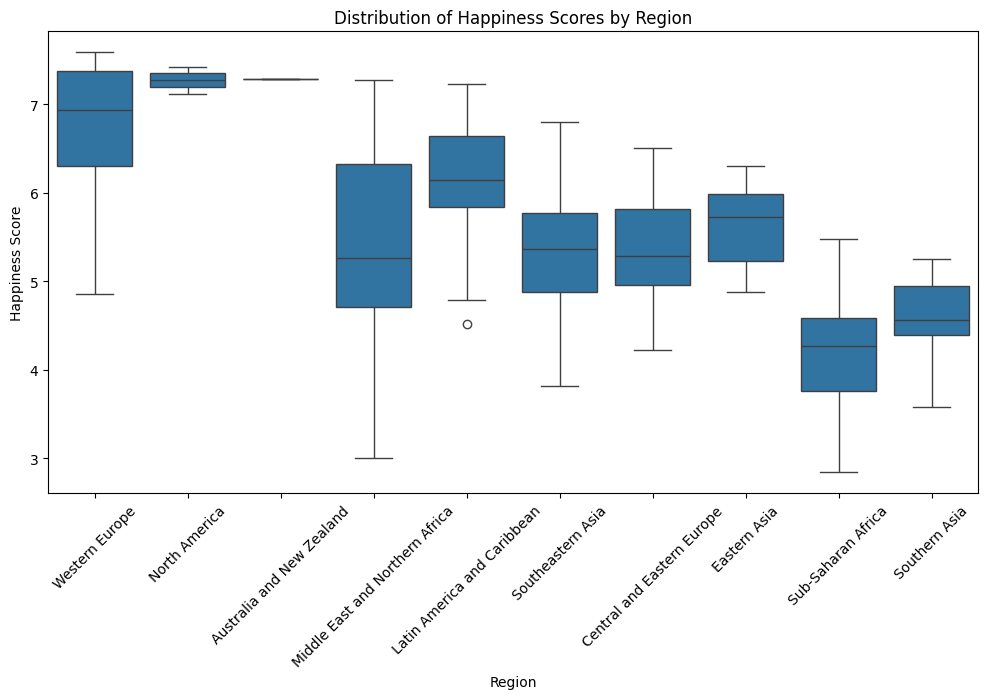

In [240]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=world_happiness_reports_2015, x='Region', y='Happiness Score')
plt.xticks(rotation=45)
plt.title('Distribution of Happiness Scores by Region')
plt.ylabel('Happiness Score')
plt.xlabel('Region')
plt.show()

# 2016

In [241]:
world_happiness_reports_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/1267859614.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=world_happiness_reports_2016, x='Region', y='Happiness Score', palette='viridis')


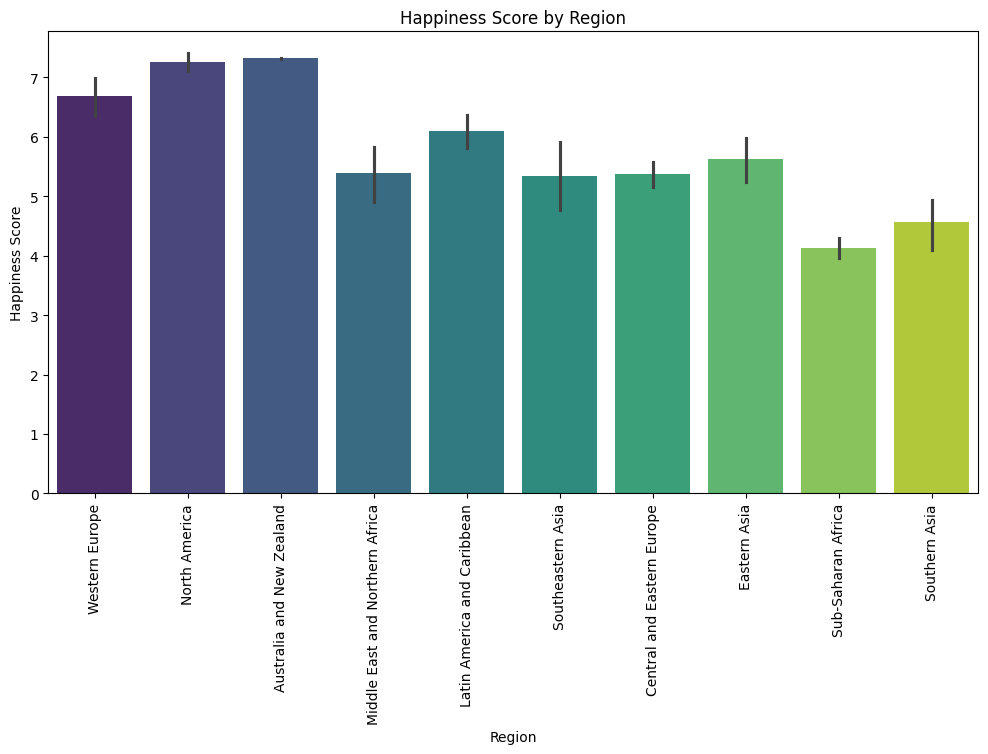

In [242]:
plt.figure(figsize=(12, 6))
sns.barplot(data=world_happiness_reports_2016, x='Region', y='Happiness Score', palette='viridis')
plt.xticks(rotation=90)
plt.title('Happiness Score by Region')
plt.ylabel('Happiness Score')
plt.xlabel('Region')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/22578232.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=world_happiness_reports_2016, x='Economy (GDP per Capita)', y='Happiness Score', palette='deep')


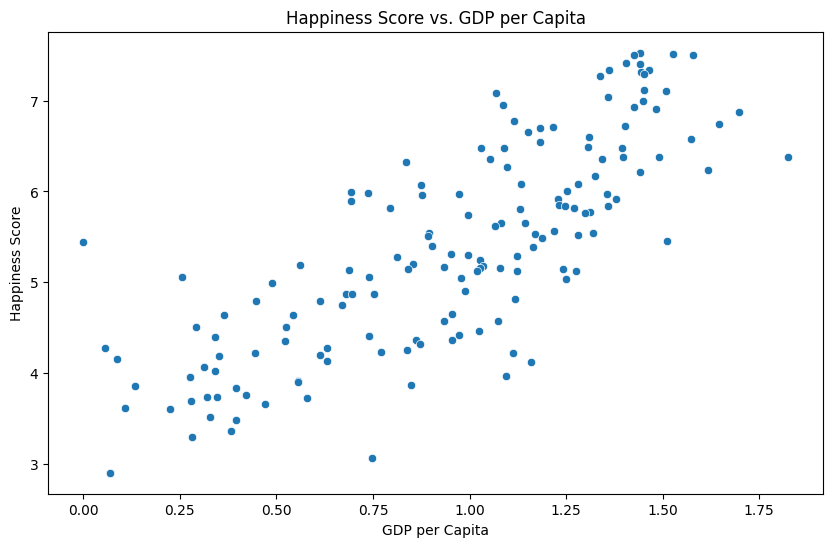

In [243]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2016, x='Economy (GDP per Capita)', y='Happiness Score', palette='deep')
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/3599094442.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


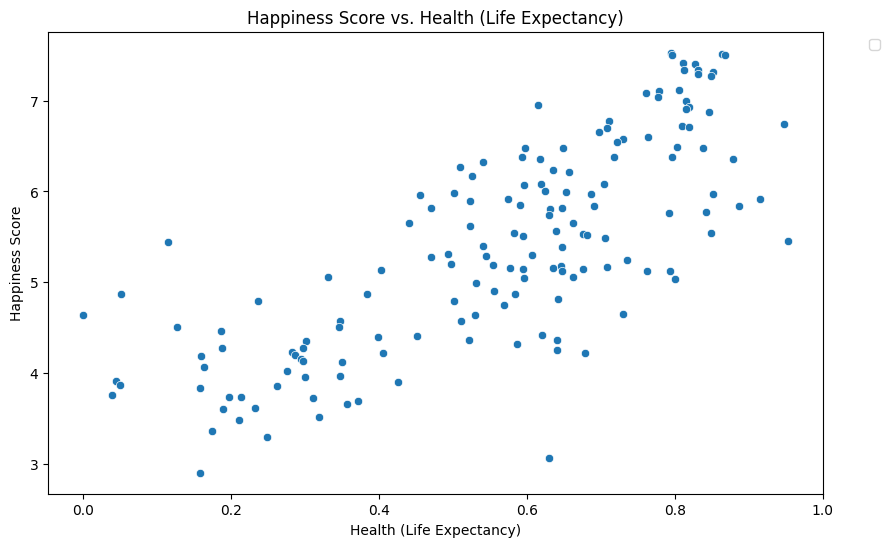

In [244]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2016, x='Health (Life Expectancy)', y='Happiness Score')
plt.title('Happiness Score vs. Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/3000344145.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


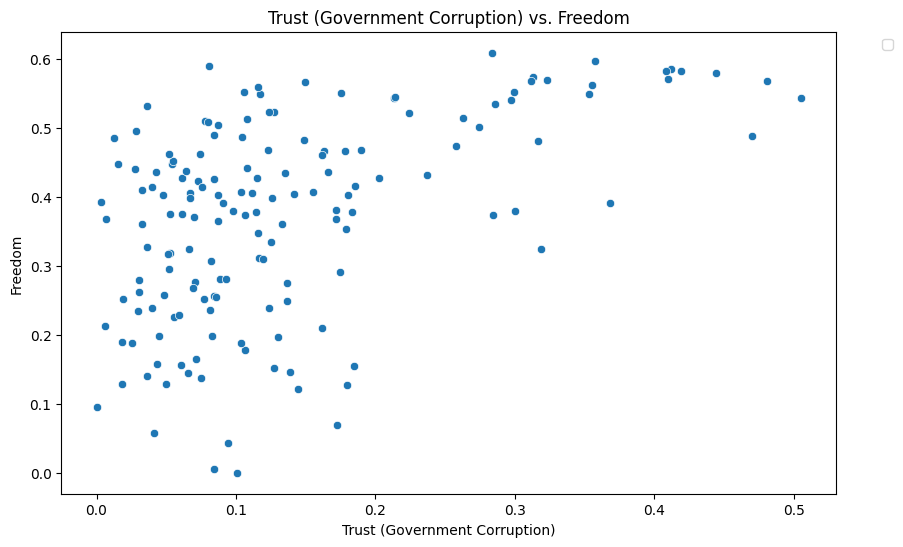

In [245]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2016, x='Trust (Government Corruption)', y='Freedom')
plt.title('Trust (Government Corruption) vs. Freedom')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/2381475341.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


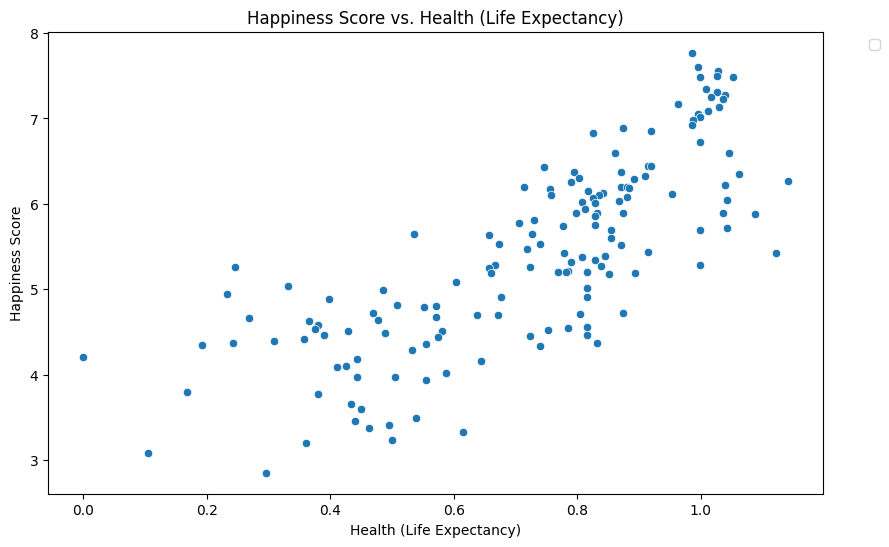

In [246]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2019, x='Health (Life Expectancy)', y='Happiness Score')
plt.title('Happiness Score vs. Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

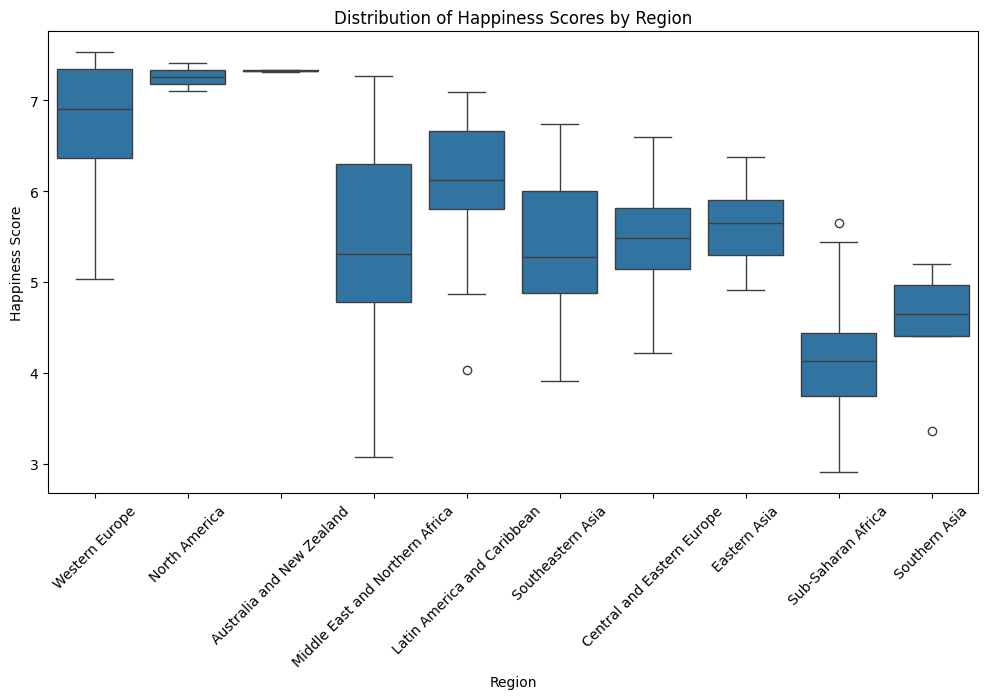

In [247]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=world_happiness_reports_2016, x='Region', y='Happiness Score')
plt.xticks(rotation=45)
plt.title('Distribution of Happiness Scores by Region')
plt.ylabel('Happiness Score')
plt.xlabel('Region')
plt.show()

# 2017

In [248]:
world_happiness_reports_2017.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/1016564909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=world_happiness_reports_2017.sort_values('Happiness Score', ascending=False).head(10),


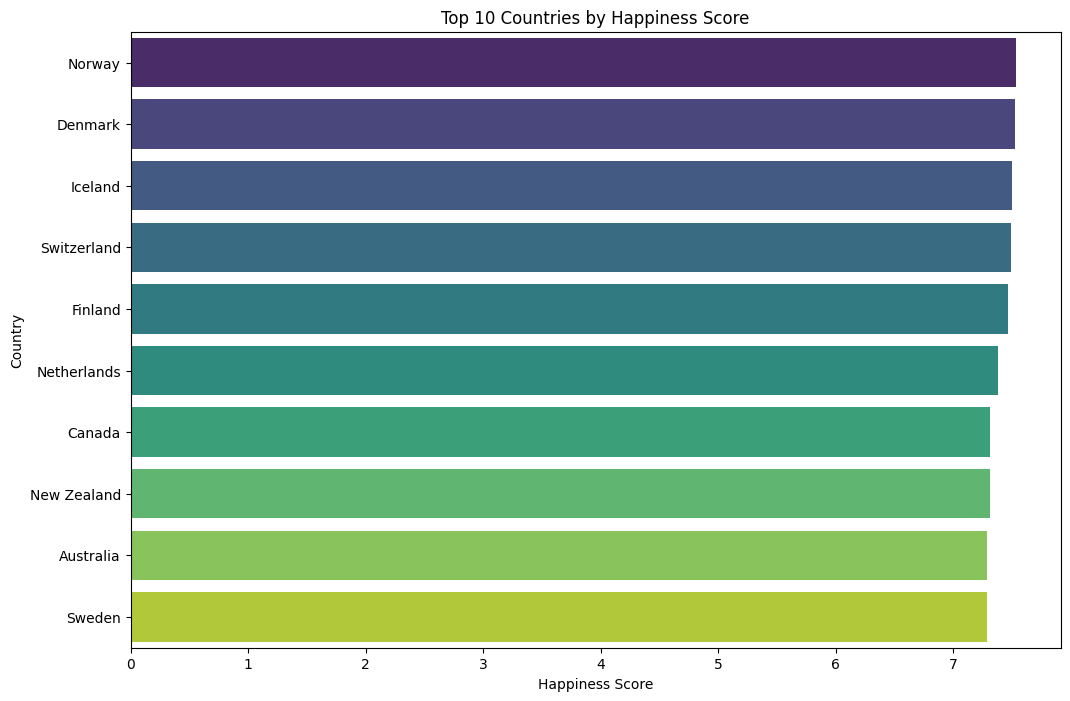

In [249]:
plt.figure(figsize=(12, 8))
sns.barplot(data=world_happiness_reports_2017.sort_values('Happiness Score', ascending=False).head(10), 
            x='Happiness Score', y='Country', palette='viridis')
plt.title('Top 10 Countries by Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

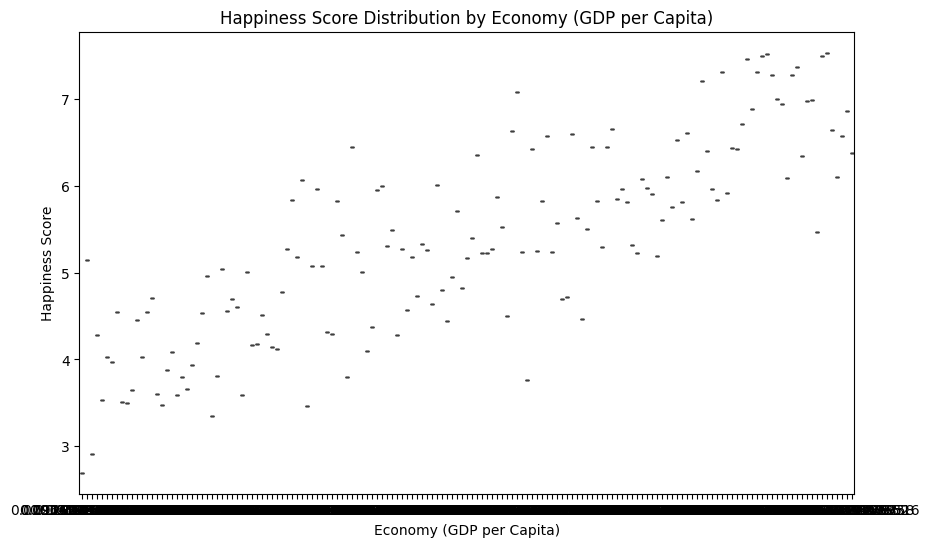

In [250]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=world_happiness_reports_2017, x='Economy (GDP per Capita)', y='Happiness Score')
plt.title('Happiness Score Distribution by Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/3978526941.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


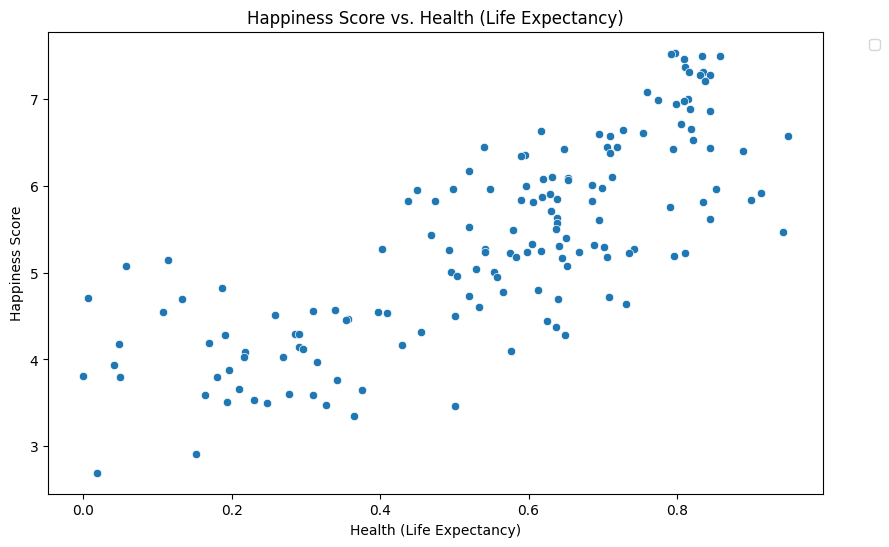

In [251]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2017, x='Health (Life Expectancy)', y='Happiness Score')
plt.title('Happiness Score vs. Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/2847781871.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


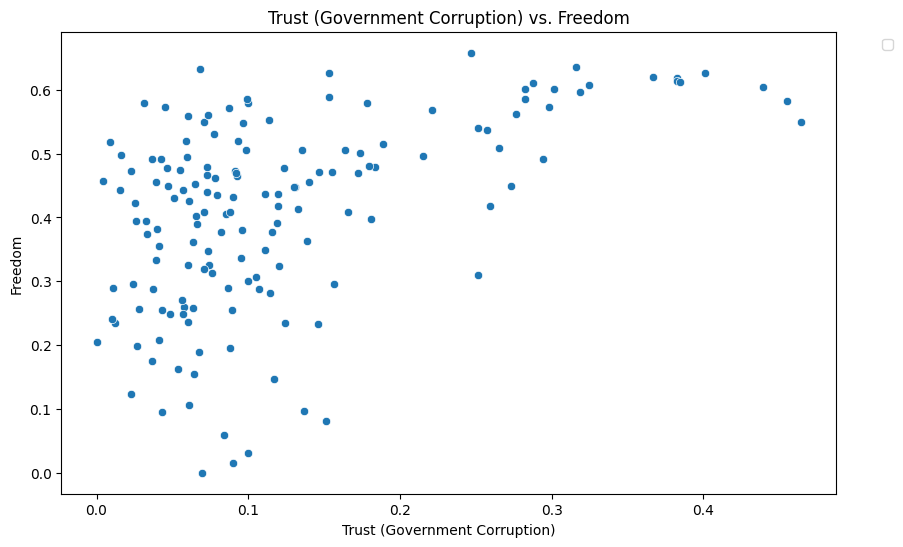

In [252]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2017, x='Trust (Government Corruption)', y='Freedom')
plt.title('Trust (Government Corruption) vs. Freedom')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Freedom')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

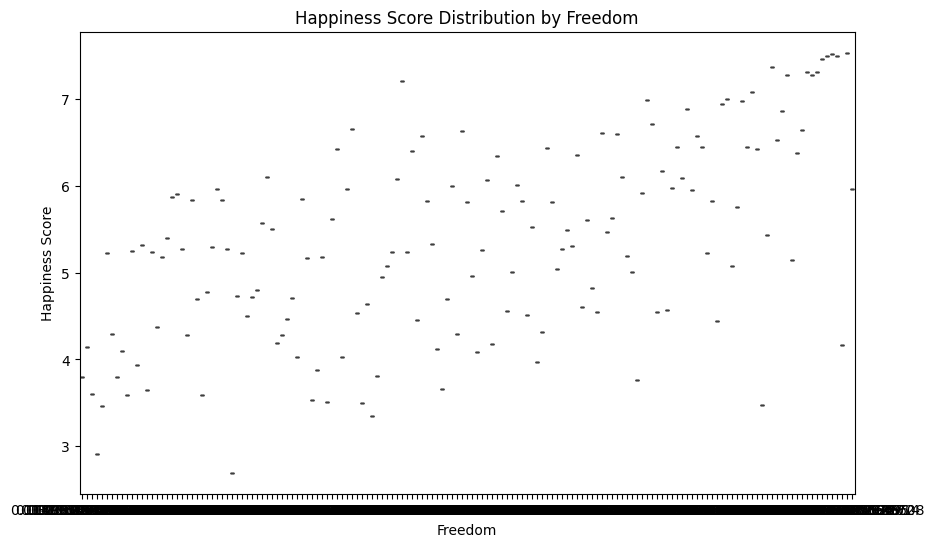

In [253]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=world_happiness_reports_2017, x='Freedom', y='Happiness Score')
plt.title('Happiness Score Distribution by Freedom')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

# 2018

In [254]:
world_happiness_reports_2018.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


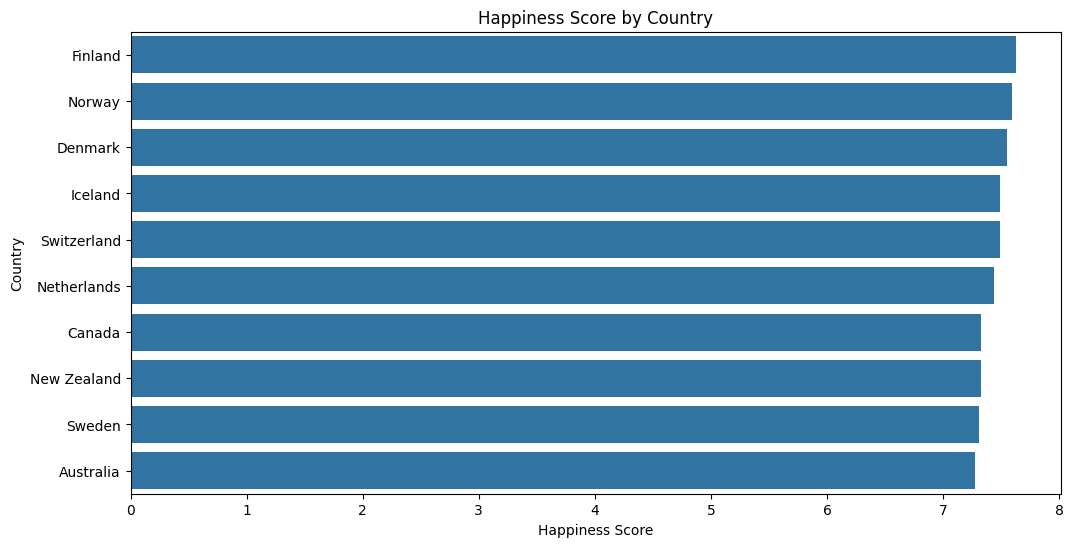

In [255]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Happiness Score', y='Country', data=world_happiness_reports_2018.head(10))
plt.title('Happiness Score by Country')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


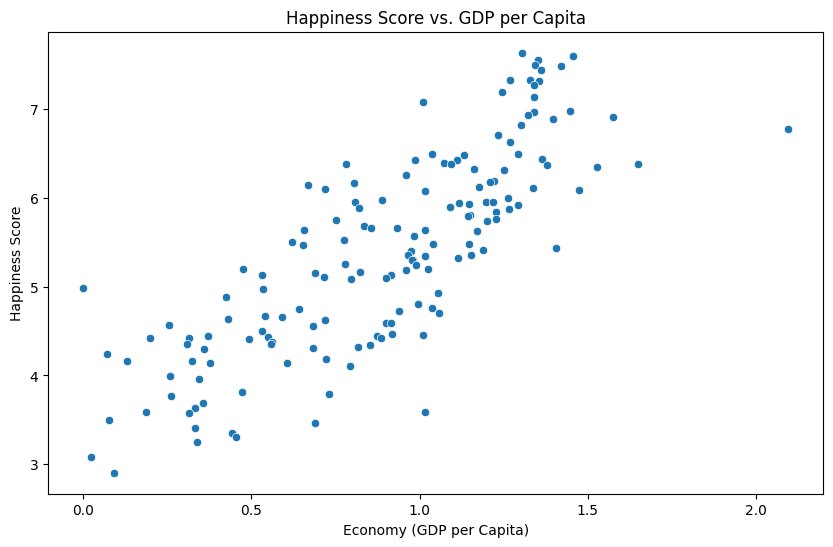

In [256]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=world_happiness_reports_2018)
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/1629243742.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


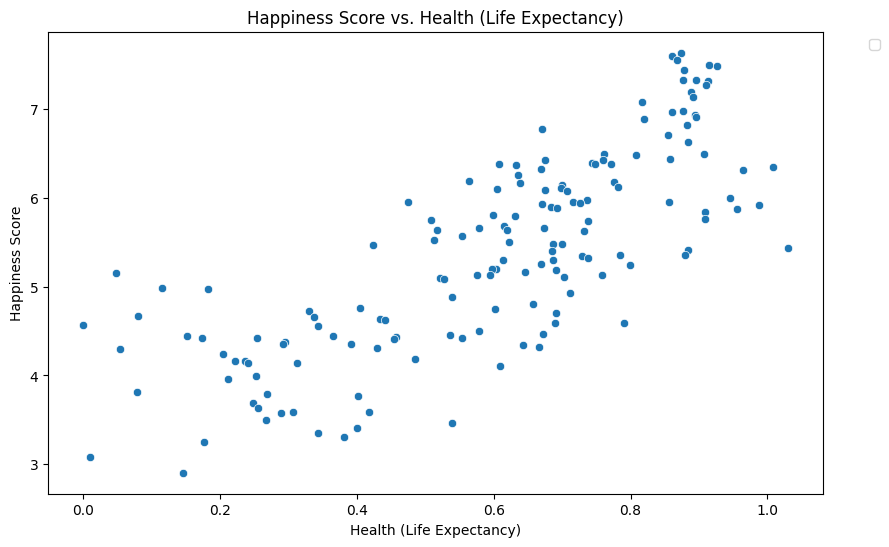

In [257]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2018, x='Health (Life Expectancy)', y='Happiness Score')
plt.title('Happiness Score vs. Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

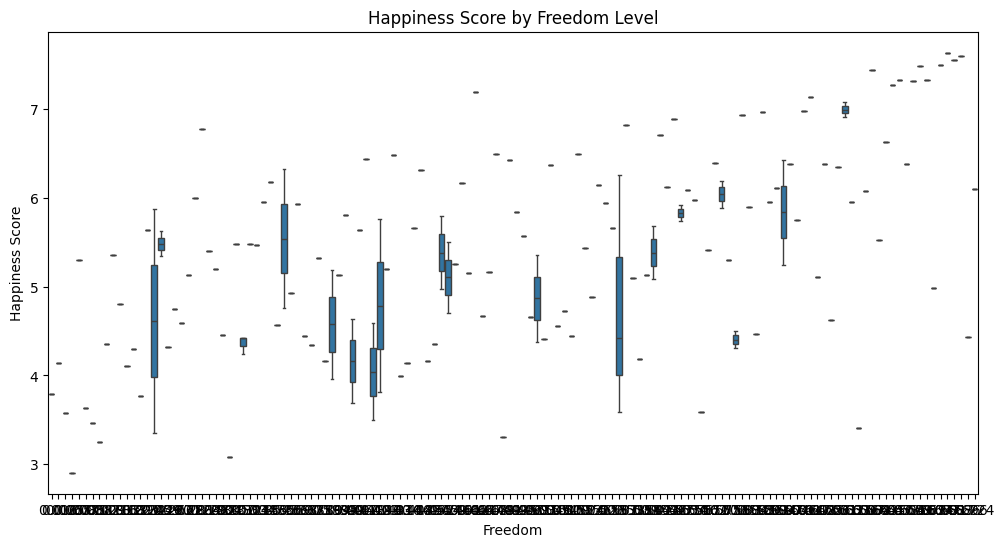

In [258]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Freedom', y='Happiness Score', data=world_happiness_reports_2018)
plt.title('Happiness Score by Freedom Level')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

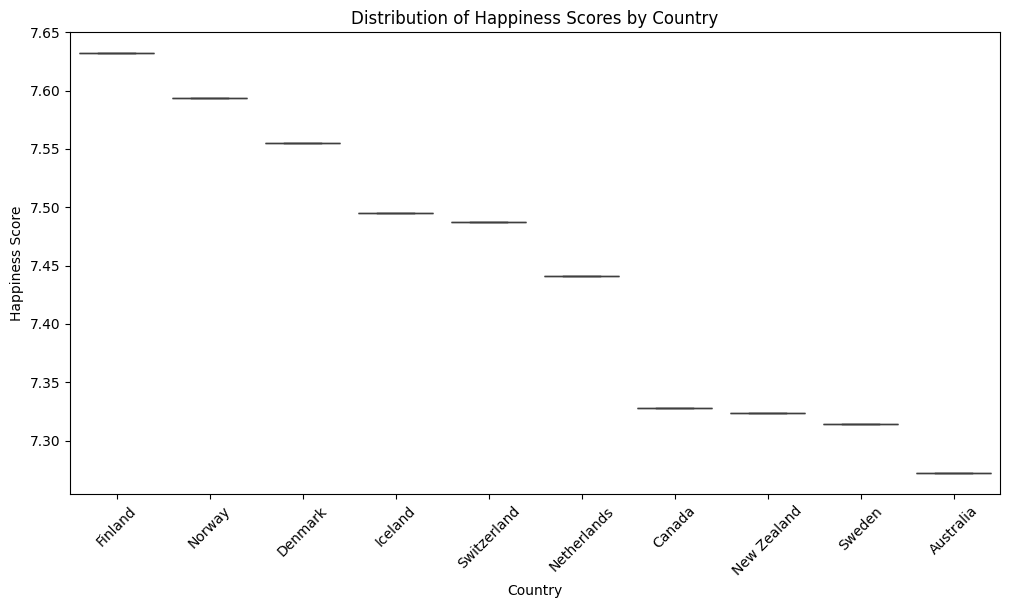

In [259]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=world_happiness_reports_2018.head(10), x='Country', y='Happiness Score')
plt.xticks(rotation=45)
plt.title('Distribution of Happiness Scores by Country')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.show()

# 2019


In [260]:
world_happiness_reports_2019.head()

,Happiness Rank,Country,Happiness Score,Economy (GDP per Capita),Social support,Health (Life Expectancy),Freedom,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/2428015618.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


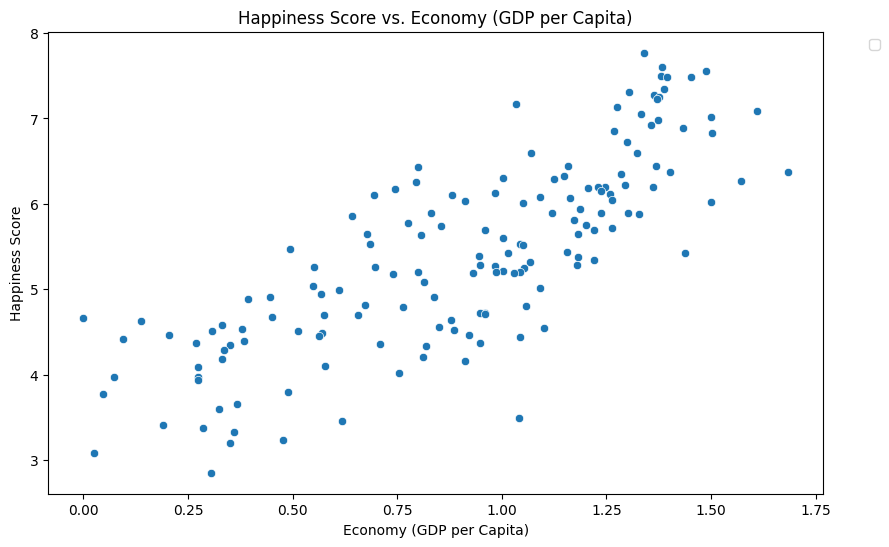

In [261]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2019, x='Economy (GDP per Capita)', y='Happiness Score')
plt.title('Happiness Score vs. Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/folders/d5/bc6tc5xj5kg1lxw1806h5khh0000gn/T/ipykernel_43452/2381475341.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


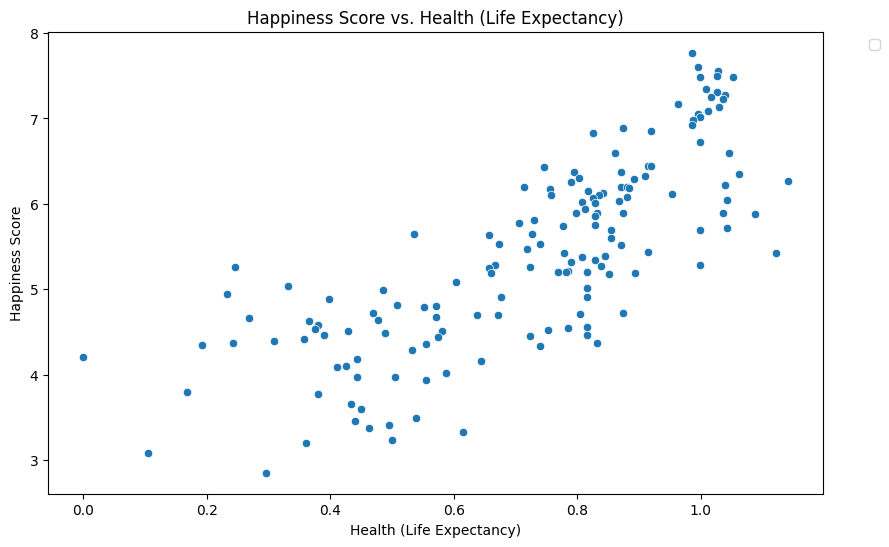

In [262]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=world_happiness_reports_2019, x='Health (Life Expectancy)', y='Happiness Score')
plt.title('Happiness Score vs. Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

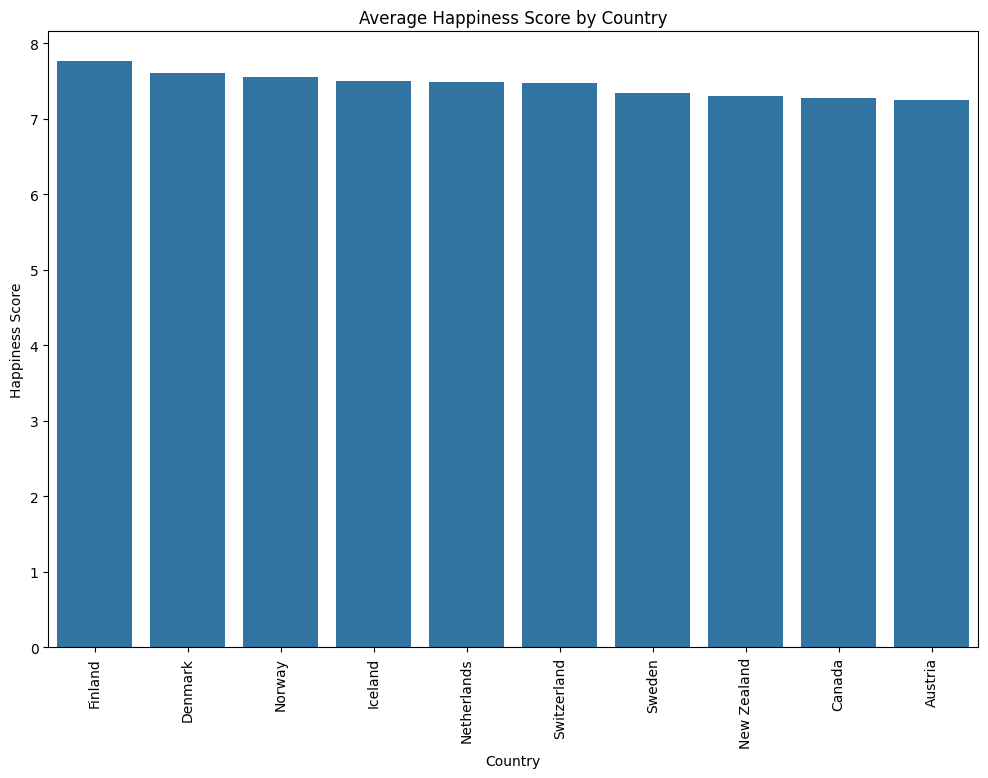

In [263]:
plt.figure(figsize=(12, 8))
sns.barplot(data=world_happiness_reports_2019.head(10), x='Country', y='Happiness Score')
plt.title('Average Happiness Score by Country')
plt.xticks(rotation=90)
plt.show()

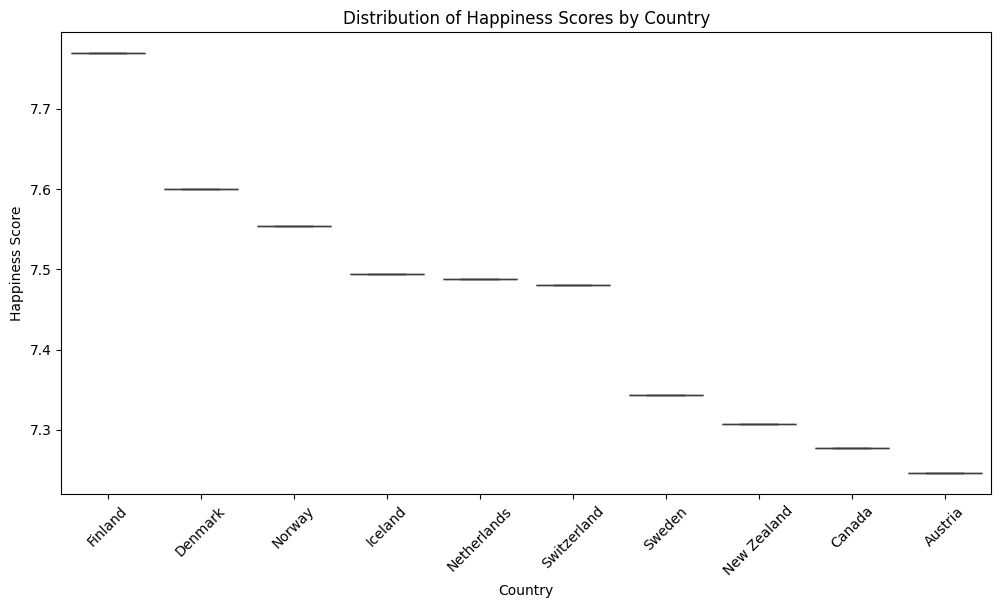

In [264]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=world_happiness_reports_2019.head(10), x='Country', y='Happiness Score')
plt.xticks(rotation=45)
plt.title('Distribution of Happiness Scores by Country')
plt.ylabel('Happiness Score')
plt.xlabel('Country')
plt.show()

In [265]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [266]:
# go to delete ouliers

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [267]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [268]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.